<h1>Deteksi Aktivitas Merokok Menggunakan YOLOV3 - Final Project Visi Komputer</h1>


Nama : Ismar Apuandi <br>
NIM : 1301193282 <br>
Kelas : IF-43-PIL-IS01 (BDP)

# 1.Setup and Import Depedencies



In [1]:
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
import os
import glob
import shutil 
import matplotlib.image as mpimg
from utils.plots import plot_results 
from matplotlib import pyplot as plt
display = utils.notebook_init()  # checks

Setup complete ✅


# 2.Data Preparation

## 2.1.Import Dataset Smoker

In [2]:
# Download dataset
!gdown '19Ih-0mTzUKF_YYFmGHhrh3OYccJ0JjDM&confirm=t'

# Unzip dataset
!unzip -qq '/content/yolov3/smoking_dataset.zip'

Downloading...
From: https://drive.google.com/uc?id=19Ih-0mTzUKF_YYFmGHhrh3OYccJ0JjDM&confirm=t
To: /content/yolov3/smoking_dataset.zip
100% 60.0M/60.0M [00:00<00:00, 205MB/s]


## 2.2.Data Configuration

In [3]:
# move the data that is ready next to yolov3 dir
%cd ..
src_dir = '/content/yolov3/dataset'
dst_dir = '/content/'
shutil.move(src_dir, dst_dir)
%cd yolov3

/content
/content/yolov3


In [4]:
# config Import .yaml files
!gdown '1fmwmSkl6tgr1aE5AXlD2tpcpcK8rvdY5&confirm=t'

# Move to yolo/data directory
src_dir_yaml = '/content/yolov3/smoking.yaml'
dst_dir_yaml = '/content/yolov3/data/'
shutil.move(src_dir_yaml, dst_dir_yaml)

Downloading...
From: https://drive.google.com/uc?id=1fmwmSkl6tgr1aE5AXlD2tpcpcK8rvdY5&confirm=t
To: /content/yolov3/smoking.yaml
100% 192/192 [00:00<00:00, 369kB/s]


'/content/yolov3/data/smoking.yaml'

In [5]:
# download font file to plot class names
!gdown '1bwmnD-cv_lUpQzyvDaGq1KlIPwA2e9_K&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=1bwmnD-cv_lUpQzyvDaGq1KlIPwA2e9_K&confirm=t
To: /content/yolov3/arial.ttf
100% 367k/367k [00:00<00:00, 128MB/s]


## 2.3.Plot Sample Data

In [50]:
from PIL import Image, ImageDraw, ImageFont
import random

def plot_rand():

    # Class
    class_names = {
        0: 'Merokok',
        1: 'Rokok',
        2: 'Tidak Merokok'
    }


    # get random images
    folder_img = '/content/dataset/images/train'
    filename_img = random.choice(os.listdir(folder_img))
    filepath_img = os.path.join(folder_img, filename_img)

    # get bounding box
    folder_bb = '/content/dataset/labels/train'
    filename_bb, _ = os.path.splitext(filename_img)
    filepath_bb = os.path.join(folder_bb, filename_bb + ".txt")

    # open Txt bounding Box
    with open(filepath_bb, 'r') as f:
        lines = f.readlines()

    # Read images
    image = Image.open(filepath_img)
    image = image.resize((500, 500), Image.ANTIALIAS)
    width_img, height_img = image.size
    draw = ImageDraw.Draw(image)

    # Iterate through each bounding box and draw it on the image
    for line in lines:
        class_number, x, y, w, h = map(float, line.split())
        x = x*width_img
        y = y*height_img
        w = w*width_img
        h = h*height_img
        half_width = w / 2
        half_height = h / 2
        left = int(x - half_width) + 1
        top = int(y - half_height) + 1
        right = int(x + half_width) + 1
        bottom = int(y + half_height) + 1
        class_name = class_names[int(class_number)]
        font = ImageFont.truetype(font='/content/yolov3/arial.ttf', size = 34)
        draw.rectangle((left, top, right, bottom), outline='red',width = 4)
        draw.text((left, top - 34), class_name, fill='red', font = font)
    
    return image


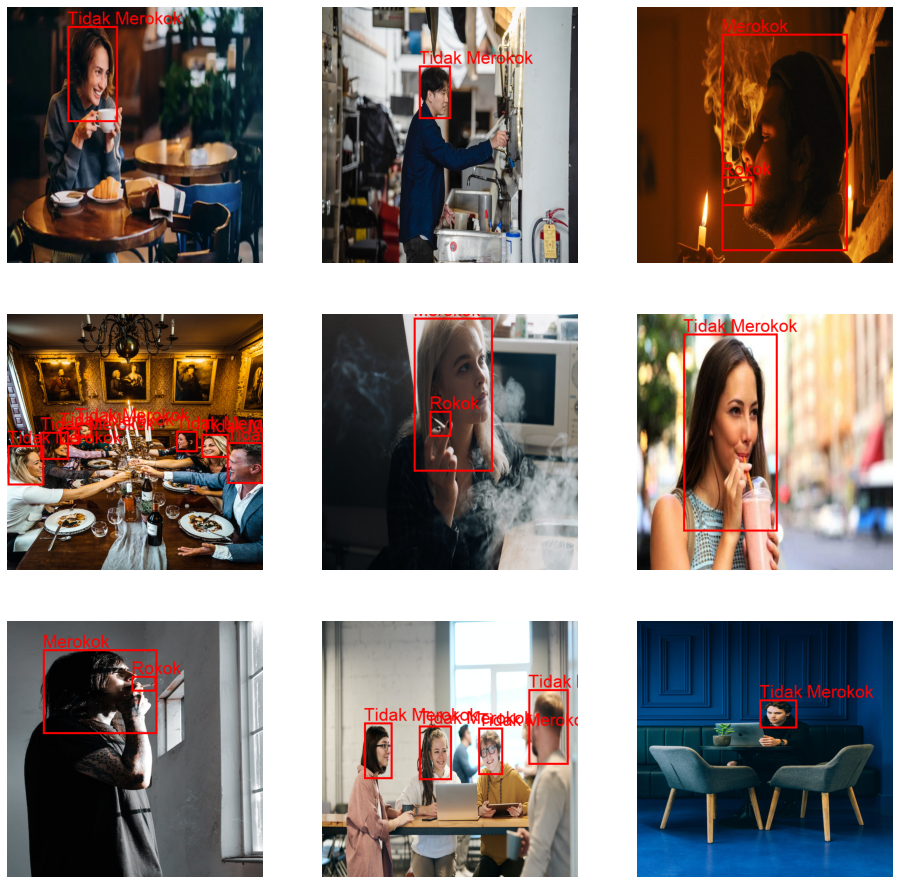

In [53]:
# plot the image and bounding box
%matplotlib inline
plt.figure(figsize = (16,16))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plot_rand())
    plt.axis('off')
plt.show()

# 3.Training with YOLOV3

## 3.1.Training with SGD Optimizer

In [8]:
# Train
!python train.py --img 512 \
                 --batch 8 \
                 --epochs 50 \
                 --data smoking.yaml \
                 --weights yolov3.pt \
                 --name 'SGD'

train: weights=yolov3.pt, cfg=, data=smoking.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=8, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=SGD, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-32-gae460cf torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear

## 3.2.Training with ADAM Optimizer

In [9]:
# Train 
!python train.py --img 512 \
                 --batch 8 \
                 --epochs 50 \
                 --data smoking.yaml \
                 --weights yolov3.pt \
                 --adam --name 'ADAM'

train: weights=yolov3.pt, cfg=, data=smoking.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=8, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=True, sync_bn=False, workers=8, project=runs/train, name=ADAM, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-32-gae460cf torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear

# 4.Evaluation

## 4.1.SGD vs ADAM Optimizer Plot

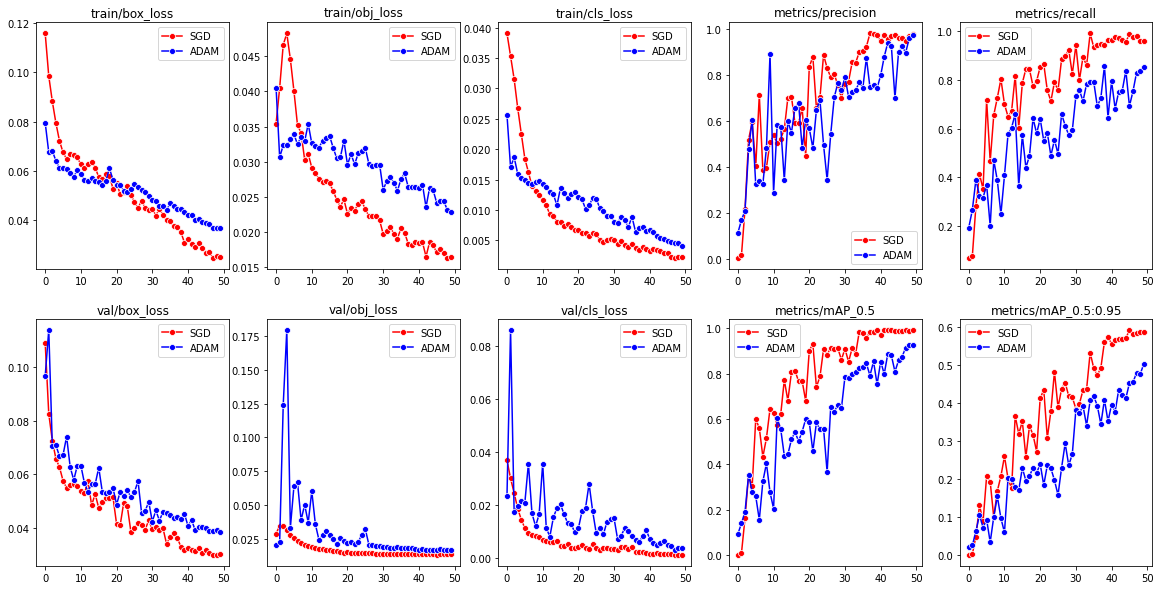

In [10]:
import pandas as pd
import seaborn as sns
sgd_df = pd.read_csv('/content/yolov3/runs/train/SGD/results.csv')
sgd_df = sgd_df.rename(columns=lambda x: x.strip())
adam_df = pd.read_csv('/content/yolov3/runs/train/ADAM/results.csv')
adam_df = adam_df.rename(columns=lambda x: x.strip())

plt.figure(figsize = (20,10))
col = 1
to_plot = ['train/box_loss', 'train/obj_loss', 'train/cls_loss',
           'metrics/precision','metrics/recall', 'val/box_loss', 'val/obj_loss', 
           'val/cls_loss','metrics/mAP_0.5','metrics/mAP_0.5:0.95']

for i in to_plot:
    plt.subplot(2, 5, col)
    sns.lineplot(data= sgd_df[i], color = "red", label = "SGD", marker = 'o')
    sns.lineplot(data= adam_df[i], color ="blue", label = "ADAM", marker = 'o')
    plt.ylabel('')
    plt.title(i) 
    col += 1

plt.legend()

plt.show()

## 4.2.Evaluate with Test Data

In [11]:
# Test YOLOv3 SGD Optimizer
!python val.py --weights '/content/yolov3/runs/train/SGD/weights/best.pt' \
                --data smoking.yaml \
                --img 512 \
                --task test \
                --iou 0.5 \
                --name 'SGD'

val: data=/content/yolov3/data/smoking.yaml, weights=['/content/yolov3/runs/train/SGD/weights/best.pt'], batch_size=32, imgsz=512, conf_thres=0.001, iou_thres=0.5, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=SGD, exist_ok=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-32-gae460cf torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
test: Scanning '../dataset/labels/test' images and labels...45 found, 0 missing, 0 empty, 0 corrupted: 100% 45/45 [00:00<00:00, 309.37it/s]
test: New cache created: ../dataset/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:03<00:00,  1.98s/it]
                 all         45        124      0.884      0.832      0.858      0.461
             merokok         45         24       0.92      0.9

In [12]:
# Test YOLOv3 ADAM Optimizer
!python val.py --weights '/content/yolov3/runs/train/ADAM/weights/best.pt' \
                --data smoking.yaml \
                --img 512 \
                --task test \
                --iou 0.5 \
                --name 'ADAM'

val: data=/content/yolov3/data/smoking.yaml, weights=['/content/yolov3/runs/train/ADAM/weights/best.pt'], batch_size=32, imgsz=512, conf_thres=0.001, iou_thres=0.5, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=ADAM, exist_ok=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-32-gae460cf torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
test: Scanning '../dataset/labels/test.cache' images and labels... 45 found, 0 missing, 0 empty, 0 corrupted: 100% 45/45 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:05<00:00,  2.54s/it]
                 all         45        124      0.731      0.759      0.755      0.372
             merokok         45         24      0.857      0.958      0.933      0.521
               rokok         

# 5.Inference Result with Best Model

## 5.1.Predict Images

In [13]:
!python detect.py --weights '/content/yolov3/runs/train/SGD/weights/best.pt'\
                  --img 512 --conf 0.25 --source '/content/dataset/images/test'\
                  --name 'BestModel(SGD)' --save-txt

detect: weights=['/content/yolov3/runs/train/SGD/weights/best.pt'], source=/content/dataset/images/test, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=BestModel(SGD), exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-32-gae460cf torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/45 /content/dataset/images/test/nonsmoking (101).jpg: 352x512 1 tidak merokok, Done. (0.036s)
image 2/45 /content/dataset/images/test/nonsmoking (11).jpg: 288x512 1 tidak merokok, Done. (0.032s)
image 3/45 /content/dataset/images/test/nonsmoking (126).jpg: 352x512 4 tidak merokoks, Done. (0.035s)
image 4/45 /content/dataset/images/test/nonsmoking (12

## 5.2.Inference Result

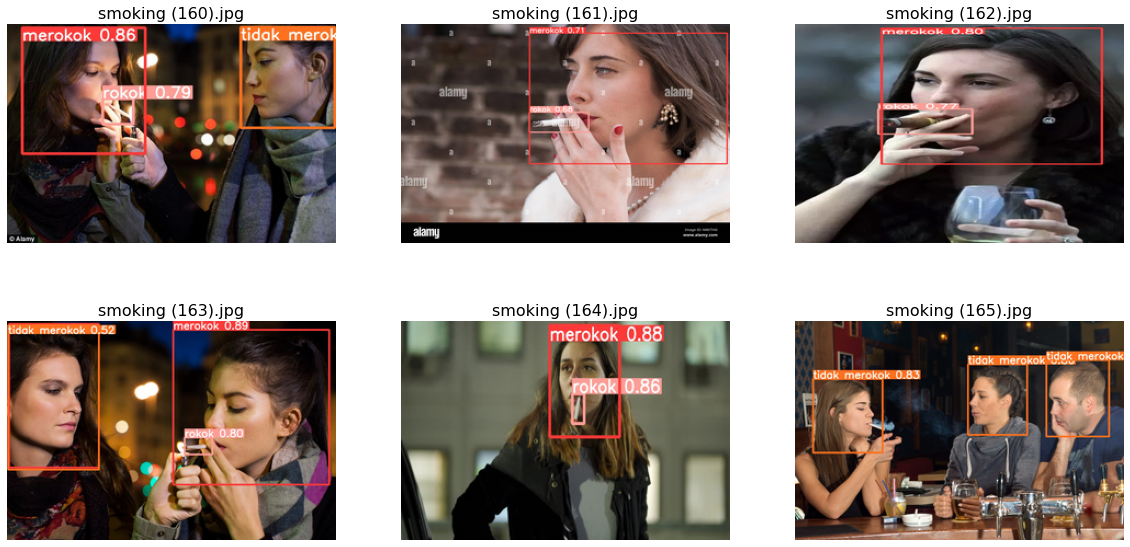

In [32]:
# Smoking
%matplotlib inline
plt.figure(figsize = (20,10))

smoking_img = ['smoking (160).jpg','smoking (161).jpg','smoking (162).jpg',
               'smoking (163).jpg','smoking (164).jpg','smoking (165).jpg']
plot = 1
for i in smoking_img:
    plt.subplot(2, 3, plot)
    img = Image.open(f'/content/yolov3/runs/detect/BestModel(SGD)/{i}')
    img = img.resize((300, 200), Image.ANTIALIAS)
    plt.imshow(img)
    plt.axis('off')
    plot += 1
    plt.title(i, fontsize = 16)

plt.show()

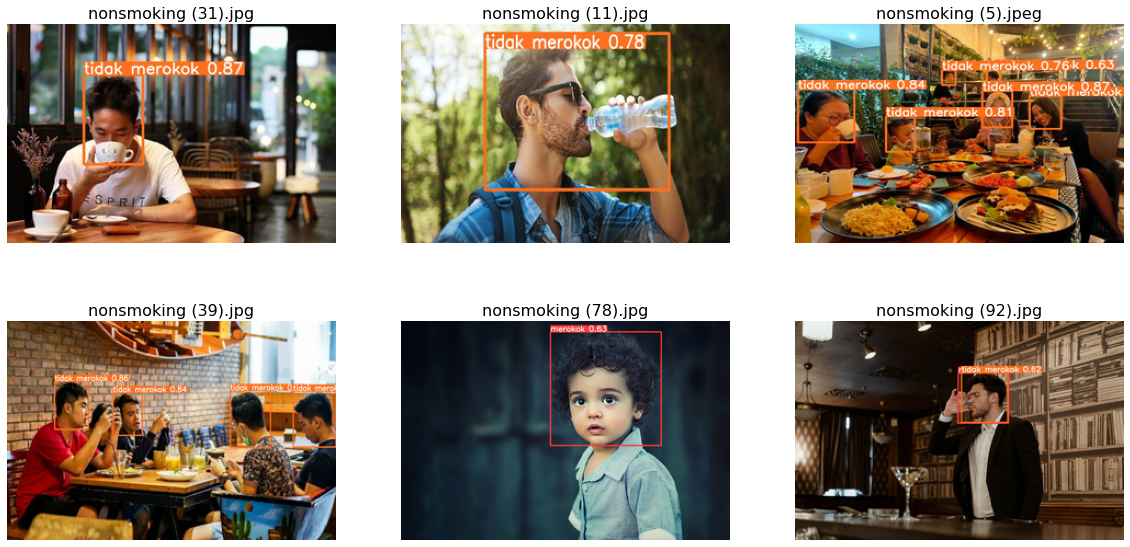

In [31]:
# Non smoking
%matplotlib inline
plt.figure(figsize = (20,10))

smoking_img = ['nonsmoking (31).jpg','nonsmoking (11).jpg','nonsmoking (5).jpeg',
               'nonsmoking (39).jpg','nonsmoking (78).jpg','nonsmoking (92).jpg']
plot = 1
for i in smoking_img:
    plt.subplot(2, 3, plot)
    img = Image.open(f'/content/yolov3/runs/detect/BestModel(SGD)/{i}')
    img = img.resize((300, 200), Image.ANTIALIAS)
    plt.imshow(img)
    plt.axis('off')
    plot += 1
    plt.title(i, fontsize = 16)

plt.show()

# 6.Save Results

## 6.1.Save Model and Evaluation Result

In [18]:
# Save trained model
!zip -r /content/modelTrainedYolov3SmokingDetection.zip /content/yolov3/runs/train

  adding: content/yolov3/runs/train/ (stored 0%)
  adding: content/yolov3/runs/train/SGD/ (stored 0%)
  adding: content/yolov3/runs/train/SGD/val_batch1_pred.jpg (deflated 11%)
  adding: content/yolov3/runs/train/SGD/events.out.tfevents.1673332443.ef3695a92493.732.0 (deflated 40%)
  adding: content/yolov3/runs/train/SGD/weights/ (stored 0%)
  adding: content/yolov3/runs/train/SGD/weights/best.pt (deflated 8%)
  adding: content/yolov3/runs/train/SGD/weights/last.pt (deflated 8%)
  adding: content/yolov3/runs/train/SGD/results.png (deflated 9%)
  adding: content/yolov3/runs/train/SGD/F1_curve.png (deflated 10%)
  adding: content/yolov3/runs/train/SGD/val_batch0_labels.jpg (deflated 9%)
  adding: content/yolov3/runs/train/SGD/val_batch1_labels.jpg (deflated 11%)
  adding: content/yolov3/runs/train/SGD/confusion_matrix.png (deflated 30%)
  adding: content/yolov3/runs/train/SGD/val_batch0_pred.jpg (deflated 8%)
  adding: content/yolov3/runs/train/SGD/train_batch2.jpg (deflated 5%)
  adding:

In [19]:
# Save eval
!zip -r /content/evaluation.zip /content/yolov3/runs/val

  adding: content/yolov3/runs/val/ (stored 0%)
  adding: content/yolov3/runs/val/SGD/ (stored 0%)
  adding: content/yolov3/runs/val/SGD/val_batch1_pred.jpg (deflated 11%)
  adding: content/yolov3/runs/val/SGD/F1_curve.png (deflated 9%)
  adding: content/yolov3/runs/val/SGD/val_batch0_labels.jpg (deflated 11%)
  adding: content/yolov3/runs/val/SGD/val_batch1_labels.jpg (deflated 11%)
  adding: content/yolov3/runs/val/SGD/confusion_matrix.png (deflated 28%)
  adding: content/yolov3/runs/val/SGD/val_batch0_pred.jpg (deflated 11%)
  adding: content/yolov3/runs/val/SGD/PR_curve.png (deflated 15%)
  adding: content/yolov3/runs/val/SGD/P_curve.png (deflated 11%)
  adding: content/yolov3/runs/val/SGD/R_curve.png (deflated 12%)
  adding: content/yolov3/runs/val/ADAM/ (stored 0%)
  adding: content/yolov3/runs/val/ADAM/val_batch1_pred.jpg (deflated 11%)
  adding: content/yolov3/runs/val/ADAM/F1_curve.png (deflated 9%)
  adding: content/yolov3/runs/val/ADAM/val_batch0_labels.jpg (deflated 11%)
  a

## 6.2.Save Inference Result

In [20]:
!zip -r /content/inferenceRes.zip /content/yolov3/runs/detect

  adding: content/yolov3/runs/detect/ (stored 0%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/ (stored 0%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/nonsmoking (92).jpg (deflated 3%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/smoking (157).jpg (deflated 4%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/smoking (150).jpg (deflated 5%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/smoking (142).jpg (deflated 3%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/smoking (156).jpg (deflated 5%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/nonsmoking (127).jpg (deflated 3%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/smoking (158).jpg (deflated 5%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/smoking (152).jpg (deflated 3%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/nonsmoking (129).jpg (deflated 2%)
  adding: content/yolov3/runs/detect/BestModel(SGD)/labels/ (stored 0%)
  adding: content/yolov3/runs/detect/BestModel(SG